# Machine Learning Models
***

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import plotly.express as px
import seaborn as sns
from time import perf_counter, sleep

import myML

from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, roc_auc_score, roc_curve
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

import statsmodels.api as sm
from statsmodels.graphics.gofplots import ProbPlot

data_dir = "./data/"
plt.rcParams['figure.figsize'] = [12, 5]

# suppress warnings


## Data

In [2]:
data = pd.read_csv(data_dir + "isotopes_clean.csv")

print(data.shape)
print(list(data.columns))
data.head()

(3149, 18)
['element', 'half_life', 'protons', 'neutrons', 'boson', 'spin', 'parity', 'atomic_weight', 'abundance', 'mass_excess', 'binding_energy', 'magnetic_moment', 'quadrupole_moment', 'magnetic_bi', 'quadrupole_bi', 'stable', 'stable_day', 'stable_year']


element     half_life  protons  neutrons  boson  spin  parity  \
0  Hydrogen  1.000000e+24        1         0      1   0.5     1.0   
1  Hydrogen  1.000000e+24        1         1      0   1.0     1.0   
2  Hydrogen  1.232000e+01        1         2      1   0.5     1.0   
3  Hydrogen  3.144784e-30        1         3      0   2.0    -1.0   
4  Hydrogen  2.537896e-30        1         4      1   0.5     1.0   

   atomic_weight  abundance  mass_excess  binding_energy  magnetic_moment  \
0       1.007825    0.99985     7.288970        0.000000         2.792847   
1       2.014102    0.00015    13.135722        1.112283         0.857438   
2       3.016049    0.00000    14.949806        2.827266         2.978962   
3       4.027806    0.00000    25.901518        1.400351              NaN   
4       5.035311    0.00000    32.892440        1.336360              NaN   

   quadrupole_moment  magnetic_bi  quadrupole_bi  stable  stable_day  \
0                NaN            1              0       1           1   
1            0.00286            1              1       1           1   
2                NaN            1              0       0           1   
3                NaN            0              0       0           0   
4                NaN            0              0       0           0   

   stable_year  
0            1  
1            1  
2            1  
3            0  
4            0

## Data Processing

In [3]:
# log half life
data["log(half_life)"] = np.log(data["half_life"])

# replace nan with 0
data["spin"] = data["spin"].replace(np.nan, 0)
data["parity"] = data["parity"].replace(np.nan, 0)
data["magnetic_moment"] = data["magnetic_moment"].replace(np.nan, 0)
data["quadrupole_moment"] = data["quadrupole_moment"].replace(np.nan, 0)

# scale
scaler = StandardScaler()
data[["protons","neutrons"]] = scaler.fit_transform(data[["protons","neutrons"]])

# Classification Models
***

## Train/Test

In [4]:
X = data[["protons","neutrons"]]
y = data["stable"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

## kNN

Estimated time : 0.064 minutes to run  2112  models
Actual time    : 0.205 minutes

Best params    :  {'algorithm': 'kd_tree', 'leaf_size': 30, 'metric': 'minkowski', 'metric_params': None, 'n_jobs': None, 'n_neighbors': 3, 'p': 1, 'weights': 'uniform'} 

Train Accuracy: 0.963490
Test Accuracy:  0.925000
F1 score:       0.434783
AUC:            0.669357


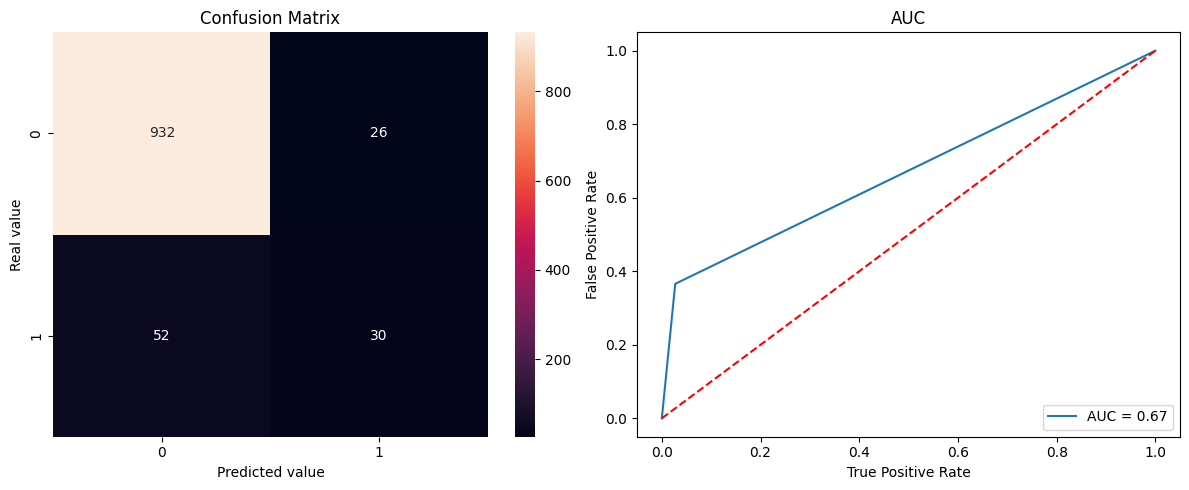

In [5]:
kNN = myML.kNNClass(X_train, X_test, y_train, y_test, scoring="f1")

## Logistic Regression

penalty l1  : 0.002 minutes
penalty l2  : 0.005 minutes
penalty elasticnet  : 0.011 minutes
penalty None  : 0.001 minutes
Full time    : 0.021 minutes

Best params    :  {'class_weight': 'balanced', 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'max_iter': 7000, 'multi_class': 'ovr', 'penalty': None, 'random_state': 42, 'solver': 'sag', 'tol': 0.0001, 'verbose': 0, 'warm_start': True} 

Train Accuracy: 0.597440
Test Accuracy:  0.567308
F1 score:       0.184783
AUC:            0.592291


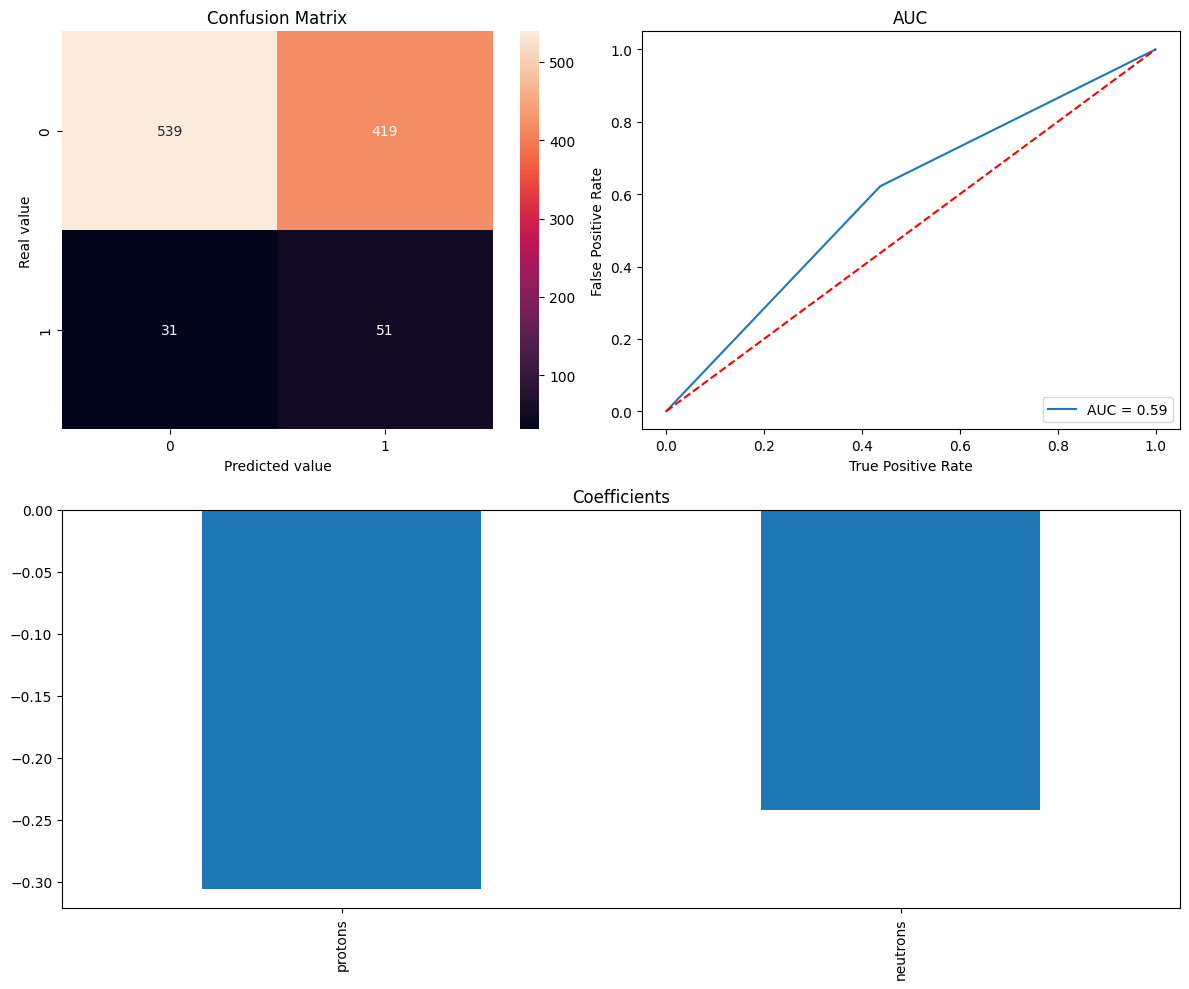

In [6]:
lr_model = myML.LogisticClass(X_train, X_test, y_train, y_test, scoring="f1")

## Stepwise Logistic Regression

Add  const                          with p-value 1.71627e-179
Drop neutrons                       with p-value 0.517394
Best features  :  ['protons', 'const'] 

penalty l1  : 0.007 minutes


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


penalty l2  : 0.078 minutes


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The ma

penalty elasticnet  : 0.079 minutes


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


penalty None  : 0.011 minutes
Full time    : 0.175 minutes

Best params    :  {'class_weight': 'balanced', 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'max_iter': 7000, 'multi_class': 'ovr', 'penalty': None, 'random_state': 42, 'solver': 'lbfgs', 'tol': 0.0001, 'verbose': 0, 'warm_start': True} 

Train Accuracy: 0.603604
Test Accuracy:  0.575000
F1 score:       0.184502
AUC:            0.590891


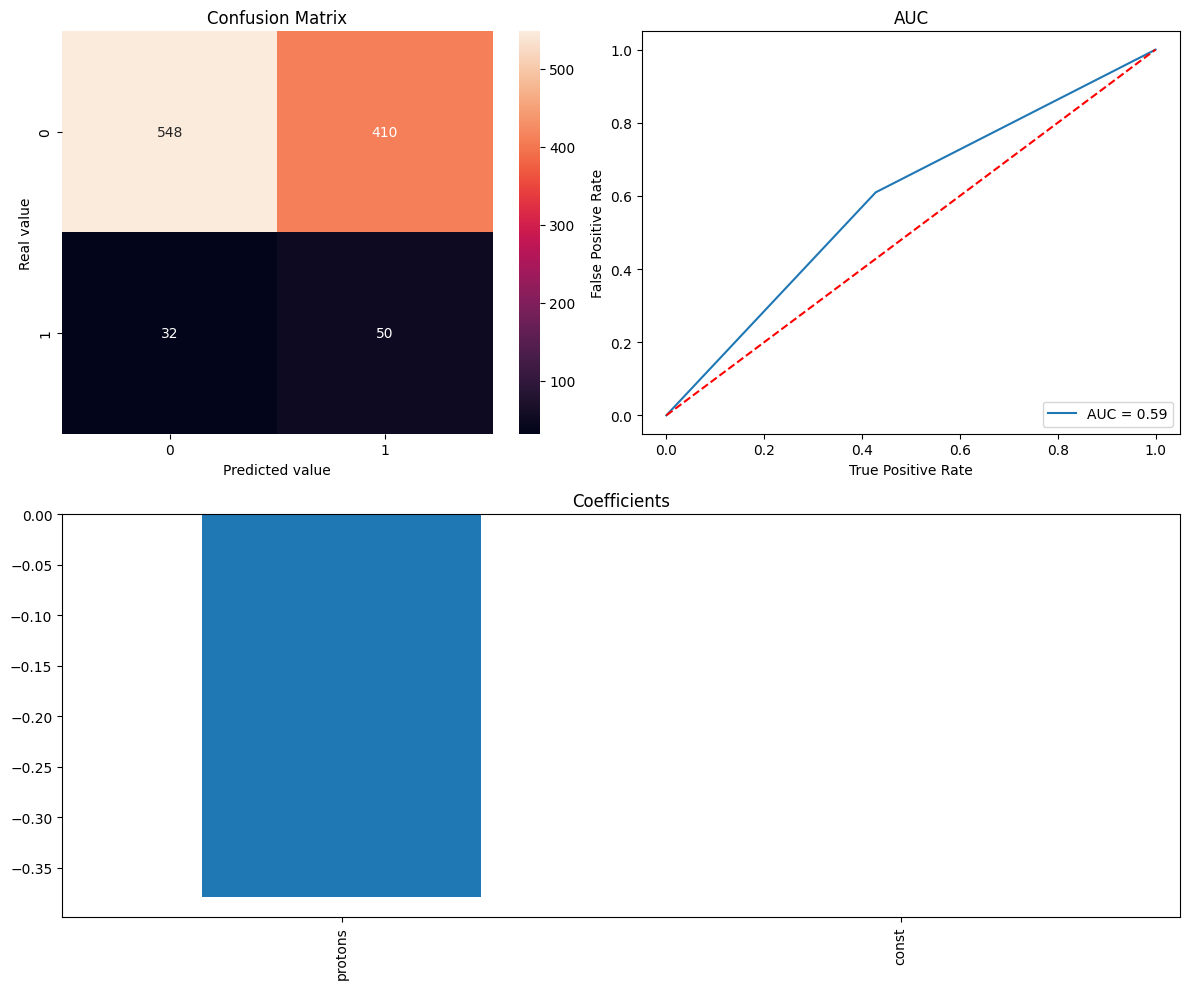

In [7]:
swlr_model = myML.StepwiseLogisticClass(
    sm.add_constant(X_train), sm.add_constant(X_test), y_train, y_test,
    ["protons","neutrons"]
)

## Random Forest Classifier

bootstrap: True, warm_start: True 	875.752 minutes
bootstrap: True, warm_start: False 	879.746 minutes
bootstrap: False, warm_start: True 	879.815 minutes
bootstrap: False, warm_start: False 	880.019 minutes
Full time    : 5.497 minutes

Best params    :  {'bootstrap': False, 'ccp_alpha': 0, 'class_weight': None, 'criterion': 'entropy', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0, 'n_estimators': 50, 'oob_score': False, 'random_state': 42, 'verbose': 0, 'warm_start': False} 

Train Accuracy: 1.000000
Test Accuracy:  0.914423
F1 score:       0.440252
AUC:            0.691494


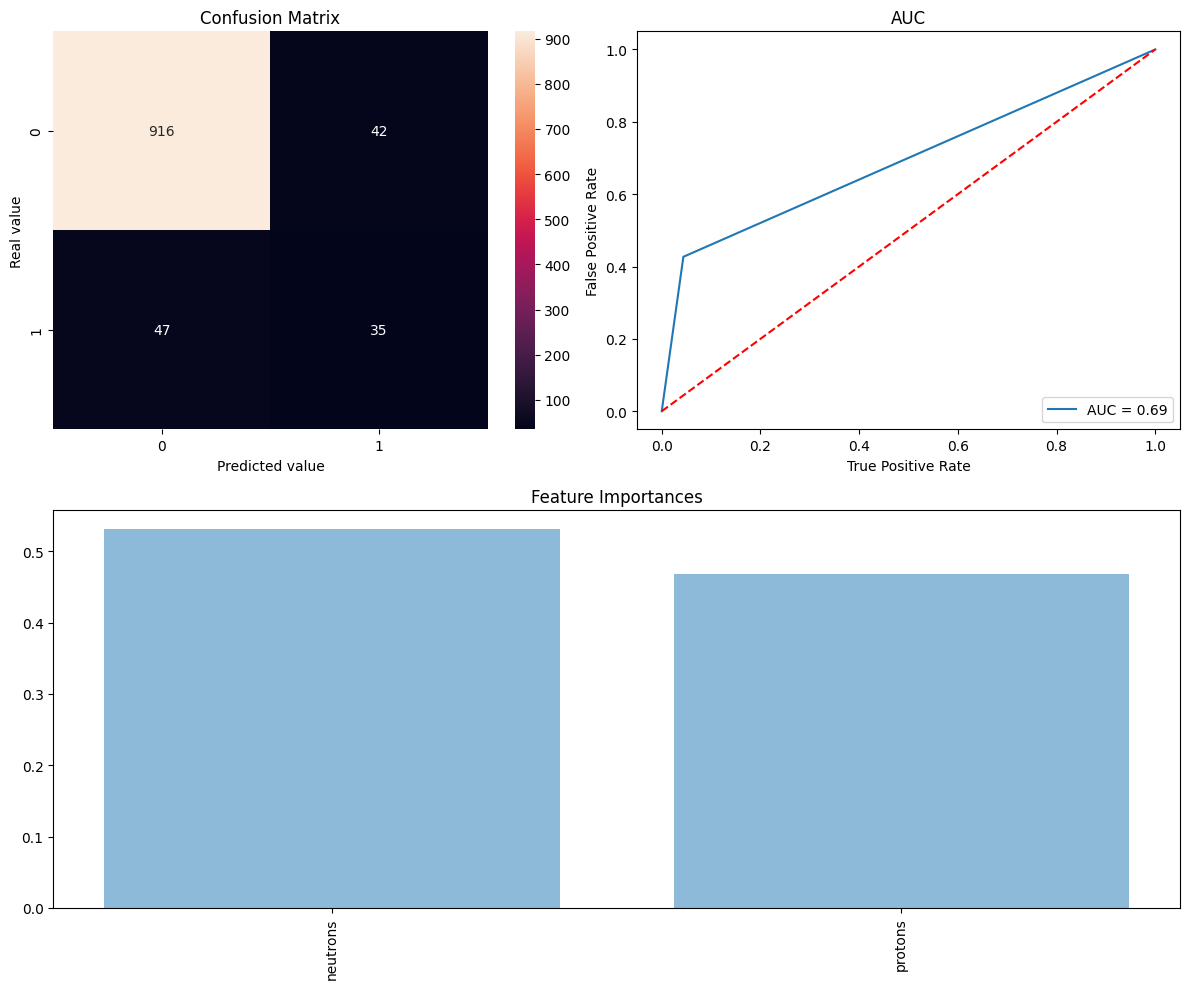

In [8]:
rf_model = myML.RandomForestClass(X_train, X_test, y_train, y_test, scoring="f1")

## Gradientboost Classifier

Full time    : 0.784 minutes

Best params    :  {'ccp_alpha': 0, 'criterion': 'friedman_mse', 'init': None, 'learning_rate': 0.01, 'loss': 'log_loss', 'max_depth': 1, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'min_impurity_decrease': 0, 'min_samples_leaf': 1, 'min_samples_split': 0.1, 'min_weight_fraction_leaf': 0, 'n_estimators': 50, 'n_iter_no_change': None, 'random_state': 42, 'subsample': 1, 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': 0, 'warm_start': True} 

Train Accuracy: 0.926505
Test Accuracy:  0.921154
F1 score:       0.000000
AUC:            0.500000


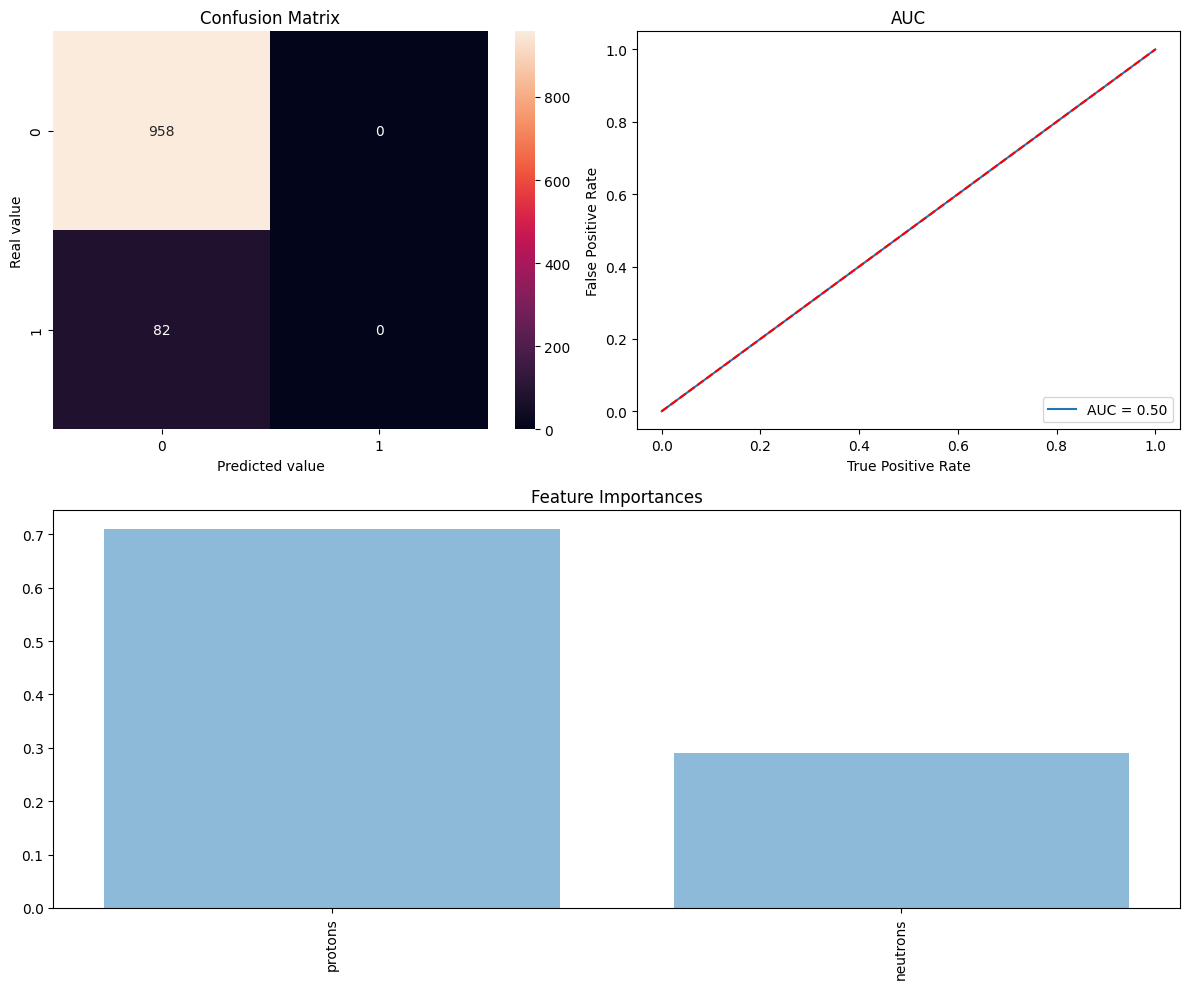

In [9]:
gbc = myML.GradientBoostClass(X_train, X_test, y_train, y_test, scoring="f1")

## SVM

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=1).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=1).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=1).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=1).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  war

linear 0.0004987520832704224  minutes
poly 0.00044064236669025074  minutes
rbf 0.0004101451333553996  minutes
sigmoid 0.00026635138334919853  minutes
Full time    : 0.002 minutes

Best params    :  {'C': 1, 'break_ties': False, 'cache_size': 200, 'class_weight': None, 'coef0': 0, 'decision_function_shape': 'ovr', 'degree': 2, 'gamma': 'auto', 'kernel': 'sigmoid', 'max_iter': 1, 'probability': False, 'random_state': 42, 'shrinking': True, 'tol': 0.001, 'verbose': False} 

Train Accuracy: 0.533428
Test Accuracy:  0.508654
F1 score:       0.177134
AUC:            0.582756


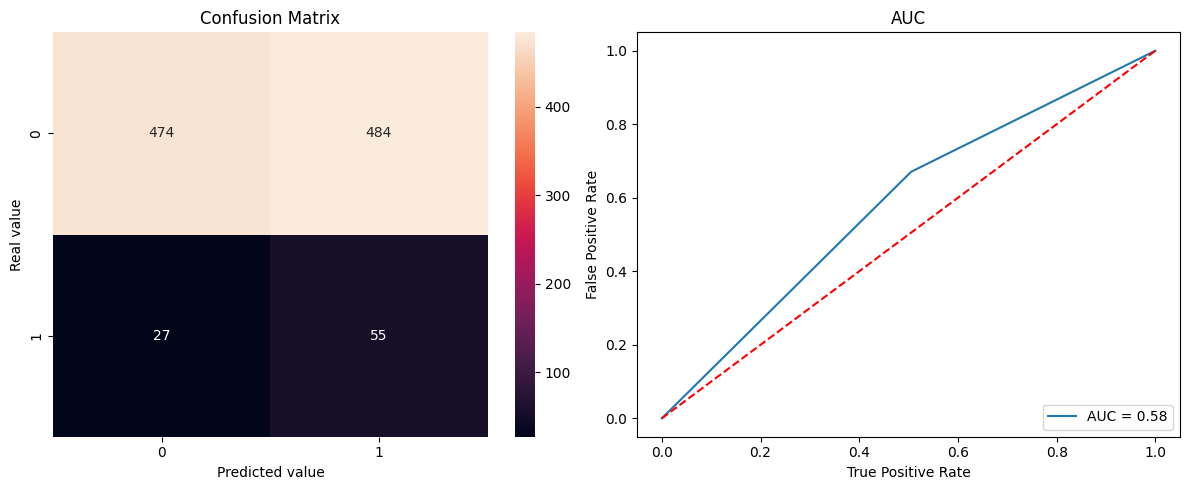

In [10]:
svc = myML.SupportVectorClass(X_train, X_test, y_train, y_test, scoring="f1")

# Regression Models
***

## Train/Test

In [11]:
df = data[data["stable"] != 1]
X = df[["protons","neutrons"]]
y = df["log(half_life)"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

y_train_class = df.loc[y_train.index]["stable_day"]
y_test_class = df.loc[y_test.index]["stable_day"]

## Linear Regression
**Assumptions:**
1. linearity (residuals vs. fitted)
2. normally distributed residuals (QQ plot)
3. equal variance residuals ($\sqrt{|Standardized\ Residuals|}$ vs. fitted)

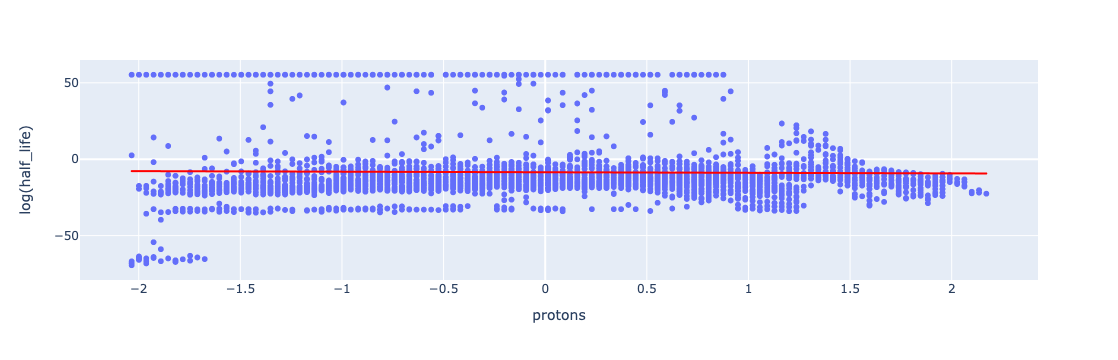

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                    0.9402
Date:                Wed, 21 Feb 2024   Prob (F-statistic):              0.332
Time:                        14:42:00   Log-Likelihood:                -14095.
No. Observations:                3149   AIC:                         2.819e+04
Df Residuals:                    3147   BIC:                         2.821e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -8.5383      0.379    -22.526      0.000      -9.281      -7.795
x1            -0.3675      0.379     -0.970      0.332      -1.111       0.376
==============================================================================
Omnibus:                     1189.125   Durbin-Watson:                   1.324
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4036.894
Skew:                           1.926   Prob(JB):                         0.00
Kurtosis:                       6.991   Cond. No.                         1.00
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [12]:
fig = px.scatter(data,
                 x="protons",
                 y=y.name,
                 trendline="ols",
                 trendline_color_override="red")
fig.show()
ols = px.get_trendline_results(fig).px_fit_results.iloc[0]
ols.summary()

### Check linearity

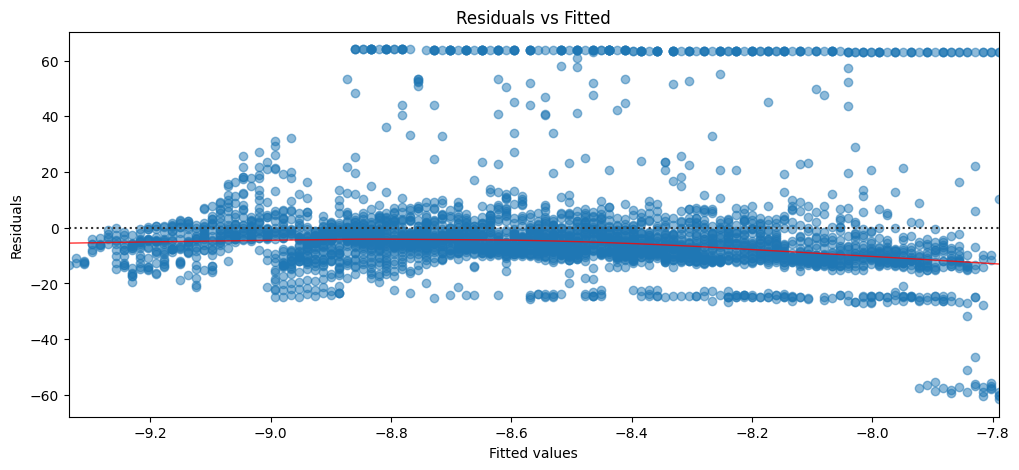

In [13]:
sns.residplot(data=data,
              x=ols.fittedvalues, 
              y=y.name, 
              lowess=True, 
              scatter_kws={"alpha": 0.5}, 
              line_kws={"color": "red", "lw": 1, "alpha": 0.8})

plt.title("Residuals vs Fitted")
plt.xlabel("Fitted values")
plt.ylabel("Residuals");

### Check residuals are normally distributed

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/graphics/gofplots.py:1045: UserWarning:

color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.0, 0.0, 1.0, 1)). The keyword argument will take precedence.



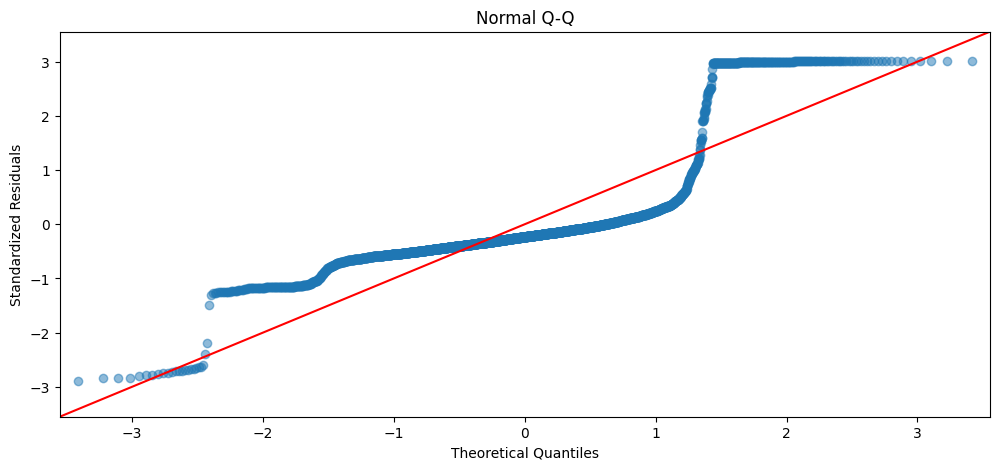

In [14]:
from statsmodels.graphics.gofplots import ProbPlot

norm_residuals = ols.get_influence().resid_studentized_internal
QQ = ProbPlot(norm_residuals)
QQ.qqplot(line= "45", alpha= 0.5, color= "#4C72B0", lw= 1)

plt.title("Normal Q-Q")
plt.xlabel("Theoretical Quantiles")
plt.ylabel("Standardized Residuals");

### Check residuals have equal variance

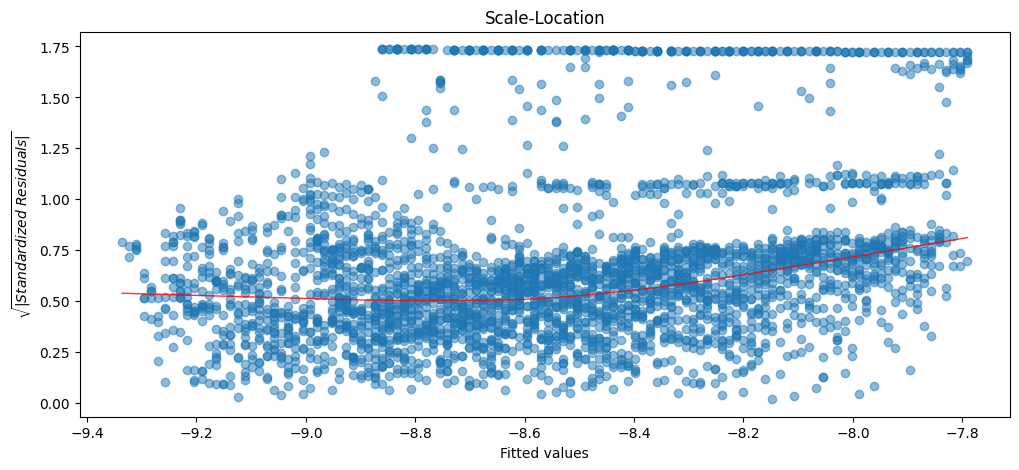

In [15]:
norm_residuals_abs_sqrt = np.sqrt(np.abs(norm_residuals))

plt.scatter(ols.fittedvalues, norm_residuals_abs_sqrt, alpha=0.5)
sns.regplot(x=ols.fittedvalues,
            y=norm_residuals_abs_sqrt,
            scatter=False, 
            ci=False, 
            lowess=True,
            line_kws={"color":"red", "lw":1, "alpha":0.8})

plt.title("Scale-Location")
plt.xlabel("Fitted values")
plt.ylabel(r"$\sqrt{|Standardized\ Residuals|}$");

## Gradient Boost Regressor

In [17]:
from sklearn.ensemble import GradientBoostingRegressor

gbr = GradientBoostingRegressor().fit(X_train, y_train)

y_pred_train_class = np.where(gbr.predict(X_test) > 1/365, 1,0)
y_pred_test_class = np.where(gbr.predict(X_train) > 1/365, 1,0)

myML.modelEvalReg(gbr, X_train, X_test, y_train, y_test)

Training set:
	R2 score            : 0.44848712168591964
	Root Mean error     : 8.545950101618843
	Mean Absolute error : 4.985530350995269
Testing set:
	R2 score            : 0.2807388767465441
	Root Mean error     : 9.574323823242693
	Mean Absolute error : 5.576751514978922


Train Accuracy: 0.865197
Test Accuracy:  0.872008
F1 score:       0.000000
AUC:            0.500000


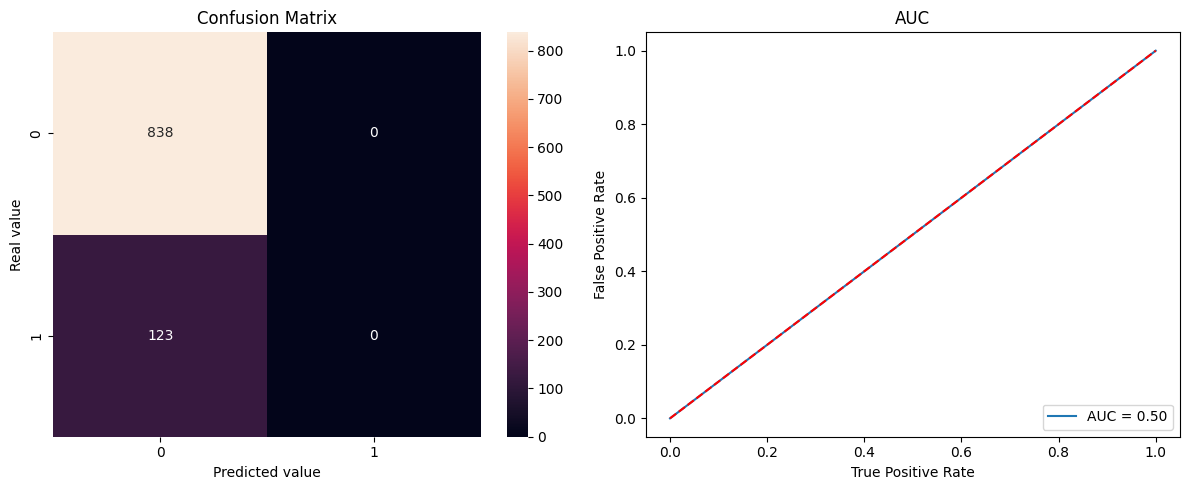

In [18]:
y_pred_test = np.where(gbr.predict(X_test) > 1/365, 1,0)
y_pred_train = np.where(gbr.predict(X_train) > 1/365, 1,0)

cm = confusion_matrix(y_test_class, y_pred_test)
fpr, tpr, thresh = roc_curve(y_test_class, y_pred_test)
auc = roc_auc_score(y_test_class, y_pred_test)

print("Train Accuracy: {:6f}".format(accuracy_score(y_train_class, y_pred_train)))
print("Test Accuracy:  {:6f}".format(accuracy_score(y_test_class, y_pred_test)))
print("F1 score:       {:6f}".format(f1_score(y_test_class, y_pred_test)))
print("AUC:            {:6f}".format(auc))

# confusion matrix
ax1 = plt.subplot(121)
sns.heatmap(cm, annot=True, fmt="d", ax=ax1)
ax1.set_ylabel("Real value")
ax1.set_xlabel("Predicted value")
ax1.set_title("Confusion Matrix")

# roc plot
ax2 = plt.subplot(122)
ax2.plot(fpr, tpr, label="AUC = %0.2f" % auc)
ax2.plot([0, 1], [0, 1], "r--")
ax2.set_ylabel("False Positive Rate")
ax2.set_xlabel("True Positive Rate")
ax2.set_title("AUC")
ax2.legend(loc="lower right")

plt.tight_layout();

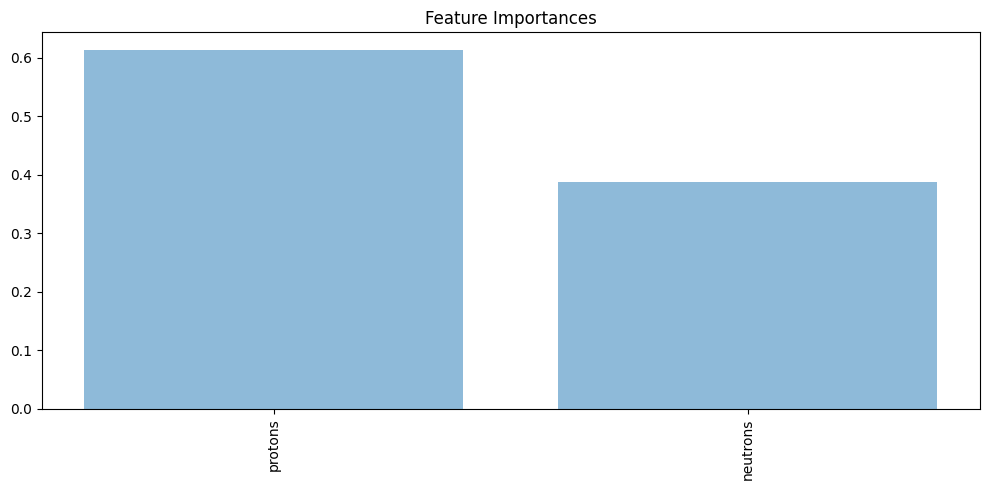

In [19]:
importances = gbr.feature_importances_
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10,5))
plt.title('Feature Importances')
plt.bar(range(X_train.shape[1]),
        importances[indices],
        align='center',
        alpha=0.5)

plt.xticks(range(X_train.shape[1]), 
           X_train.columns.values[indices], rotation=90)
plt.tight_layout();

# Clustering Models
***

## K Means Clustering

In [20]:
from sklearn.cluster import KMeans

drop_cols = ["element"]
df = data.drop(drop_cols, axis=1)

kmeans = KMeans(n_clusters=2)
kmeans = kmeans.fit(df)

labels = kmeans.predict(df)
C = kmeans.cluster_centers_
df["cluster"] = labels

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



### Elbow Plot

# Neural Network

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import plotly.express as px
import seaborn as sns
from time import perf_counter, sleep

from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, roc_auc_score, roc_curve
from sklearn.preprocessing import MinMaxScaler

from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.models import Sequential

data_dir = "./data/"
plt.rcParams['figure.figsize'] = [12, 5]
np.random.seed(69)

In [ ]:
def modelEvalNN(model, X_train, X_test, y_train, y_test):
    y_pred = np.where(model.predict(X_test) > 0.5, 1, 0)
    y_pred_train = np.where(model.predict(X_train) > 0.5, 1, 0)

    cm = confusion_matrix(y_test, y_pred)
    fpr, tpr, thresh = roc_curve(y_test, y_pred)
    auc = roc_auc_score(y_test, y_pred)

    print("Train Accuracy: {:6f}".format(accuracy_score(y_train, y_pred_train)))
    print("Test Accuracy:  {:6f}".format(accuracy_score(y_test, y_pred)))
    print("F1 score:       {:6f}".format(f1_score(y_test, y_pred)))
    print("AUC:            {:6f}".format(auc))

    # confusion matrix
    ax1 = plt.subplot(121)
    sns.heatmap(cm, annot=True, fmt="d", ax=ax1)
    ax1.set_ylabel("Real value")
    ax1.set_xlabel("Predicted value")
    ax1.set_title("Confusion Matrix")

    # roc plot
    ax2 = plt.subplot(122)
    ax2.plot(fpr, tpr, label="AUC = %0.2f" % auc)
    ax2.plot([0, 1], [0, 1], "r--")
    ax2.set_ylabel("False Positive Rate")
    ax2.set_xlabel("True Positive Rate")
    ax2.set_title("AUC")
    ax2.legend(loc="lower right")

    plt.tight_layout();

In [ ]:
data = pd.read_csv(data_dir + "final_data.csv")

print(data.shape)
print(list(data.columns))
data.head()

In [ ]:
drop_cols = ["game_id", "pts_diff", "season", "date_time_GMT", "away_team_id", "home_team_id", "outcome",
             "venue_time_zone_offset", "game_num_home", "game_num_away", "days_on_road_home"]
df = data.drop(drop_cols, axis=1)

X_train = df[data["season"] != 5]
y_train = data[data["season"] != 5]["outcome"]

X_test = df[data["season"] == 5]
y_test = data[data["season"] == 5]["outcome"]

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
early_stop = EarlyStopping(monitor="val_loss", mode="max", verbose=0, patience=25)

model = Sequential()

model.add(Dense(46, activation="relu"))
#model.add(Dropout(0.2))

model.add(Dense(23, activation="relu"))
model.add(Dropout(0.3))

model.add(Dense(12, activation="relu"))
model.add(Dropout(0.3))

model.add(Dense(6, activation="relu"))
model.add(Dropout(0.3))

model.add(Dense(3, activation="relu"))
model.add(Dropout(0.3))

model.add(Dense(1, activation="sigmoid"))

model.compile(loss="binary_crossentropy", optimizer="adam")

history = model.fit(X_train, y_train, epochs=600, validation_data=(X_test,y_test), callbacks=[early_stop], verbose=0)

modelEvalNN(model, X_train, X_test, y_train, y_test)

In [ ]:
pd.DataFrame(history.history).plot()